# **LAB 2 - PART 1 PCA**
- Data Exploration
- PCA
- Simple Linear Regression


### Import tools
as listed in Lab direction sheet

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.decomposition import PCA 
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score
from scipy.stats import mode
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

## Data Exploration and Transformation
Read the Data_example.csv files from https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data

<details>

<summary>
<font size="3" color="green">
<b>Hints</b>
</font>
</summary>

- parameter name `header`.
</details>
<br>
<details>

<summary>
<font size="3" color="orange">
<b>Expected output</b>
</font>
</summary>

</br>

|   | 0 | 1    | 2   | 3   | 4    | 5   | 6   | 7   | 8    | 9   | 10  | 11  | 12  | 13  |
|---|---|------|-----|-----|------|-----|-----|-----|------|-----|----|----|----|----|
| 0 | 1 | 14.23 | 1.71 | 2.43 | 15.6 | 127 | 2.80 | 3.06 | 0.28 | 2.29 | 5.64 | 1.04 | 3.92 | 1065 |
| 1 | 1 | 13.20 | 1.78 | 2.14 | 11.2 | 100 | 2.65 | 2.76 | 0.26 | 1.28 | 4.38 | 1.05 | 3.40 | 1050 |
| 2 | 1 | 13.16 | 2.36 | 2.67 | 18.6 | 101 | 2.80 | 3.24 | 0.30 | 2.81 | 5.68 | 1.03 | 3.17 | 1185 |
| 3 | 1 | 14.37 | 1.95 | 2.50 | 16.8 | 113 | 3.85 | 3.49 | 0.24 | 2.18 | 7.80 | 0.86 | 3.45 | 1480 |
| 4 | 1 | 13.24 | 2.59 | 2.87 | 21.0 | 118 | 2.80 | 2.69 | 0.39 | 1.82 | 4.32 | 1.04 | 2.93 | 735 |


</details>

In [2]:
### START CODE HERE ###
df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data", header=None)
### END CODE HERE ###
df

0      1     2     3     4    5     6     7     8     9      10    11  \
0     1  14.23  1.71  2.43  15.6  127  2.80  3.06  0.28  2.29   5.64  1.04   
1     1  13.20  1.78  2.14  11.2  100  2.65  2.76  0.26  1.28   4.38  1.05   
2     1  13.16  2.36  2.67  18.6  101  2.80  3.24  0.30  2.81   5.68  1.03   
3     1  14.37  1.95  2.50  16.8  113  3.85  3.49  0.24  2.18   7.80  0.86   
4     1  13.24  2.59  2.87  21.0  118  2.80  2.69  0.39  1.82   4.32  1.04   
..   ..    ...   ...   ...   ...  ...   ...   ...   ...   ...    ...   ...   
173   3  13.71  5.65  2.45  20.5   95  1.68  0.61  0.52  1.06   7.70  0.64   
174   3  13.40  3.91  2.48  23.0  102  1.80  0.75  0.43  1.41   7.30  0.70   
175   3  13.27  4.28  2.26  20.0  120  1.59  0.69  0.43  1.35  10.20  0.59   
176   3  13.17  2.59  2.37  20.0  120  1.65  0.68  0.53  1.46   9.30  0.60   
177   3  14.13  4.10  2.74  24.5   96  2.05  0.76  0.56  1.35   9.20  0.61   

       12    13  
0    3.92  1065  
1    3.40  1050  
2    3.17  1185  
3    3.45  1480  
4    2.93   735  
..    ...   ...  
173  1.74   740  
174  1.56   750  
175  1.56   835  
176  1.62   840  
177  1.60   560  

[178 rows x 14 columns]

Set the column names according to the order specified in this list: `['Class label', 'Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash', 'Magnesium', 'Total phenols', 'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins', 'Color intensity', 'Hue', 'OD280/OD315 of diluted wines', 'Proline']`

<details>

<summary>
<font size="3" color="green">
<b>Hints</b>
</font>
</summary>

- `df.column`
</details>

<br>
<details>
<summary>
<font size="3" color="orange">
<b>Expected output</b>
</font>
</summary>

</br>

| Class label | Alcohol | Malic acid | Ash | Alcalinity of ash | Magnesium | Total phenols | Flavanoids | Nonflavanoid phenols | Proanthocyanins | Color intensity | Hue | OD280/OD315 of diluted wines | Proline |
|-------------|---------|------------|-----|---------------------|-----------|---------------|------------|----------------------|------------------|------------------|-----|------------------------------|---------|
|      1      |  14.23  |    1.71    | 2.43 |        15.6         |    127    |      2.80     |    3.06    |         0.28         |       2.29       |       5.64       | 1.04|            3.92              |  1065   |
|      1      |  13.20  |    1.78    | 2.14 |        11.2         |    100    |      2.65     |    2.76    |         0.26         |       1.28       |       4.38       | 1.05|            3.40              |  1050   |
|      1      |  13.16  |    2.36    | 2.67 |        18.6         |    101    |      2.80     |    3.24    |         0.30         |       2.81       |       5.68       | 1.03|            3.17              |  1185   |
|      1      |  14.37  |    1.95    | 2.50 |        16.8         |    113    |      3.85     |    3.49    |         0.24         |       2.18       |       7.80       | 0.86|            3.45              |  1480   |
|      1      |  13.24  |    2.59    | 2.87 |        21.0         |    118    |      2.80     |    2.69    |         0.39         |       1.82       |       4.32       | 1.04|            2.93              |   735   |



</details>

In [3]:
### START CODE HERE ###

columns_name = ['Class label', 'Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash', 'Magnesium', 'Total phenols', 'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins', 'Color intensity', 'Hue', 'OD280/OD315 of diluted wines', 'Proline']
df.columns = columns_name
### END CODE HERE ###
df

Class label  Alcohol  Malic acid   Ash  Alcalinity of ash  Magnesium  \
0              1    14.23        1.71  2.43               15.6        127   
1              1    13.20        1.78  2.14               11.2        100   
2              1    13.16        2.36  2.67               18.6        101   
3              1    14.37        1.95  2.50               16.8        113   
4              1    13.24        2.59  2.87               21.0        118   
..           ...      ...         ...   ...                ...        ...   
173            3    13.71        5.65  2.45               20.5         95   
174            3    13.40        3.91  2.48               23.0        102   
175            3    13.27        4.28  2.26               20.0        120   
176            3    13.17        2.59  2.37               20.0        120   
177            3    14.13        4.10  2.74               24.5         96   

     Total phenols  Flavanoids  Nonflavanoid phenols  Proanthocyanins  \
0             2.80        3.06                  0.28             2.29   
1             2.65        2.76                  0.26             1.28   
2             2.80        3.24                  0.30             2.81   
3             3.85        3.49                  0.24             2.18   
4             2.80        2.69                  0.39             1.82   
..             ...         ...                   ...              ...   
173           1.68        0.61                  0.52             1.06   
174           1.80        0.75                  0.43             1.41   
175           1.59        0.69                  0.43             1.35   
176           1.65        0.68                  0.53             1.46   
177           2.05        0.76                  0.56             1.35   

     Color intensity   Hue  OD280/OD315 of diluted wines  Proline  
0               5.64  1.04                          3.92     1065  
1               4.38  1.05                          3.40     1050  
2               5.68  1.03                          3.17     1185  
3               7.80  0.86                          3.45     1480  
4               4.32  1.04                          2.93      735  
..               ...   ...                           ...      ...  
173             7.70  0.64                          1.74      740  
174             7.30  0.70                          1.56      750  
175            10.20  0.59                          1.56      835  
176             9.30  0.60                          1.62      840  
177             9.20  0.61                          1.60      560  

[178 rows x 14 columns]

**Data Explore and Cleaning**

Fill NA? Drop something?<br>
Up to your own decision. ***Please try to understand the data before doing any operation.***

In [4]:
### START CODE HERE ###
df.describe()
### END CODE HERE ###

Class label     Alcohol  Malic acid         Ash  Alcalinity of ash  \
count   178.000000  178.000000  178.000000  178.000000         178.000000   
mean      1.938202   13.000618    2.336348    2.366517          19.494944   
std       0.775035    0.811827    1.117146    0.274344           3.339564   
min       1.000000   11.030000    0.740000    1.360000          10.600000   
25%       1.000000   12.362500    1.602500    2.210000          17.200000   
50%       2.000000   13.050000    1.865000    2.360000          19.500000   
75%       3.000000   13.677500    3.082500    2.557500          21.500000   
max       3.000000   14.830000    5.800000    3.230000          30.000000   

        Magnesium  Total phenols  Flavanoids  Nonflavanoid phenols  \
count  178.000000     178.000000  178.000000            178.000000   
mean    99.741573       2.295112    2.029270              0.361854   
std     14.282484       0.625851    0.998859              0.124453   
min     70.000000       0.980000    0.340000              0.130000   
25%     88.000000       1.742500    1.205000              0.270000   
50%     98.000000       2.355000    2.135000              0.340000   
75%    107.000000       2.800000    2.875000              0.437500   
max    162.000000       3.880000    5.080000              0.660000   

       Proanthocyanins  Color intensity         Hue  \
count       178.000000       178.000000  178.000000   
mean          1.590899         5.058090    0.957449   
std           0.572359         2.318286    0.228572   
min           0.410000         1.280000    0.480000   
25%           1.250000         3.220000    0.782500   
50%           1.555000         4.690000    0.965000   
75%           1.950000         6.200000    1.120000   
max           3.580000        13.000000    1.710000   

       OD280/OD315 of diluted wines      Proline  
count                    178.000000   178.000000  
mean                       2.611685   746.893258  
std                        0.709990   314.907474  
min                        1.270000   278.000000  
25%                        1.937500   500.500000  
50%                        2.780000   673.500000  
75%                        3.170000   985.000000  
max                        4.000000  1680.000000

**Split the variables**

X includes all columns except `Class label`, Y includes only `Class label`.

In [6]:
### START CODE HERE ###
X = df[df.columns.difference(["Class label"])]
Y = df[['Class label']]
# print(Y.columns)
### END CODE HERE ###


Index(['Class label'], dtype='object')


<details>

<summary>
<font size="3" color="orange">
<b>Expected output</b>
</font>
</summary>

```
X's columns: ['Alcalinity of ash', 'Alcohol', 'Ash', 'Color intensity', 'Flavanoids', 'Hue', 'Magnesium', 'Malic acid', 'Nonflavanoid phenols', 'OD280/OD315 of diluted wines', 'Proanthocyanins', 'Proline', 'Total phenols']
Y's column: ['Class label']
```

</details>

In [7]:
print("X's columns:",X.columns.tolist())
print("Y's column:",Y.columns.tolist())

X's columns: ['Alcalinity of ash', 'Alcohol', 'Ash', 'Color intensity', 'Flavanoids', 'Hue', 'Magnesium', 'Malic acid', 'Nonflavanoid phenols', 'OD280/OD315 of diluted wines', 'Proanthocyanins', 'Proline', 'Total phenols']
Y's column: ['Class label']


**Data Transformation**

Standardize X Dataframe.
<details>

<summary>
<font size="3" color="green">
<b>Hints</b>
</font>
</summary>

- Scikitlearn's `preprocessing` migth be useful here.</br>
https://scikit-learn.org/stable/modules/preprocessing.html
</details> 
<br>
<details>

<summary>
<font size="3" color="orange">
<b>Expected output</b>
</font>
</summary>

</br>

|                  | Alcalinity of ash | Alcohol | Ash             | Color intensity | Flavanoids | Hue              | Magnesium | Malic acid | Nonflavanoid phenols | OD280/OD315 of diluted wines | Proanthocyanins | Proline | Total phenols |
|------------------|-------------------|---------|-----------------|------------------|------------|------------------|-----------|------------|----------------------|-----------------------------|-----------------|---------|---------------|
| count            | 178.0             | 178.0   | 178.0           | 178.0            | 178.0      | 178.0            | 178.0     | 178.0      | 178.0                | 178.0                       | 178.0           | 178.0   | 178.0         |
| mean             | 0.0               | 0.0     | 1.247442e-17    | 9.979533e-18     | 0.0        | 0.0              | 0.0       | 1.197544e-16 | 0.0                  | 0.0                         | 0.0             | 0.0     | 0.0           |
| std              | 1.002821          | 1.002821| 1.002821        | 1.002821         | 1.002821   | 1.002821         | 1.002821  | 1.002821   | 1.002821             | 1.002821                    | 1.002821        | 1.002821| 1.002821      |
| min              | -2.671018         | -2.434235| -3.679162       | -1.634288        | -1.695971  | -2.094732        | -2.088255 | -1.432983  | -1.868234            | -2.069034                   | -1.493188       | -2.107246| -2.671018     |
| 25%              | -0.689137         | -0.788245| -0.5721225      | -0.7951025       | -0.827539  | -0.767562        | -0.824415 | -0.6587486 | -0.7401408           | -0.597284                   | -0.784638       | -0.885468| -0.689137     |
| 50%              | 0.001518          | 0.061   | -0.02382132     | -0.1592246       | 0.10615    | 0.033127         | -0.122282 | -0.423112  | -0.1760947           | -0.0628977                  | -0.233720       | 0.09596 | 0.001518      |
| 75%              | 0.602088          | 0.836129| 0.6981085       | 0.493956         | 0.849085   | 0.713164         | 0.509638  | 0.6697929  | 0.6095407            | 0.629175                    | 0.7582486       | 0.808997| 0.602088      |
| max              | 3.154511          | 2.259772| 3.156325        | 3.435432         | 3.062832   | 3.301694         | 4.371372  | 3.109192   | 2.402403             | 1.960915                    | 3.485073        | 2.971473| 3.154511      |


</details>

In [8]:
###START CODE HERE###
standardize_scaler = preprocessing.StandardScaler()
X_std = standardize_scaler.fit_transform(X)
X_std_df = pd.DataFrame(X_std, columns=X.columns)
###END CODE HERE###
X_std_df.describe()

Alcalinity of ash       Alcohol           Ash  Color intensity  \
count       1.780000e+02  1.780000e+02  1.780000e+02     1.780000e+02   
mean       -3.991813e-17 -8.382808e-16 -8.370333e-16     2.494883e-17   
std         1.002821e+00  1.002821e+00  1.002821e+00     1.002821e+00   
min        -2.671018e+00 -2.434235e+00 -3.679162e+00    -1.634288e+00   
25%        -6.891372e-01 -7.882448e-01 -5.721225e-01    -7.951025e-01   
50%         1.518295e-03  6.099988e-02 -2.382132e-02    -1.592246e-01   
75%         6.020883e-01  8.361286e-01  6.981085e-01     4.939560e-01   
max         3.154511e+00  2.259772e+00  3.156325e+00     3.435432e+00   

         Flavanoids           Hue     Magnesium    Malic acid  \
count  1.780000e+02  1.780000e+02  1.780000e+02  1.780000e+02   
mean  -3.991813e-16  1.995907e-16 -3.991813e-17 -1.197544e-16   
std    1.002821e+00  1.002821e+00  1.002821e+00  1.002821e+00   
min   -1.695971e+00 -2.094732e+00 -2.088255e+00 -1.432983e+00   
25%   -8.275393e-01 -7.675624e-01 -8.244151e-01 -6.587486e-01   
50%    1.061497e-01  3.312687e-02 -1.222817e-01 -4.231120e-01   
75%    8.490851e-01  7.131644e-01  5.096384e-01  6.697929e-01   
max    3.062832e+00  3.301694e+00  4.371372e+00  3.109192e+00   

       Nonflavanoid phenols  OD280/OD315 of diluted wines  Proanthocyanins  \
count          1.780000e+02                  1.780000e+02     1.780000e+02   
mean           3.592632e-16                  3.193450e-16    -1.197544e-16   
std            1.002821e+00                  1.002821e+00     1.002821e+00   
min           -1.868234e+00                 -1.895054e+00    -2.069034e+00   
25%           -7.401412e-01                 -9.522483e-01    -5.972835e-01   
50%           -1.760948e-01                  2.377348e-01    -6.289785e-02   
75%            6.095413e-01                  7.885875e-01     6.291754e-01   
max            2.402403e+00                  1.960915e+00     3.485073e+00   

            Proline  Total phenols  
count  1.780000e+02     178.000000  
mean  -1.596725e-16       0.000000  
std    1.002821e+00       1.002821  
min   -1.493188e+00      -2.107246  
25%   -7.846378e-01      -0.885468  
50%   -2.337204e-01       0.095960  
75%    7.582494e-01       0.808997  
max    2.971473e+00       2.539515

**Visualize Variable (scatter plot pairs of variables)**
<details>

<summary>
<font size="3" color="green">
<b>Hints</b>
</font>
</summary>

- `sns.pairplot()`
</details> 
<br>


<details>

<summary>
<font size="3" color="orange">
<b>Expected output</b>
</font>
</summary>

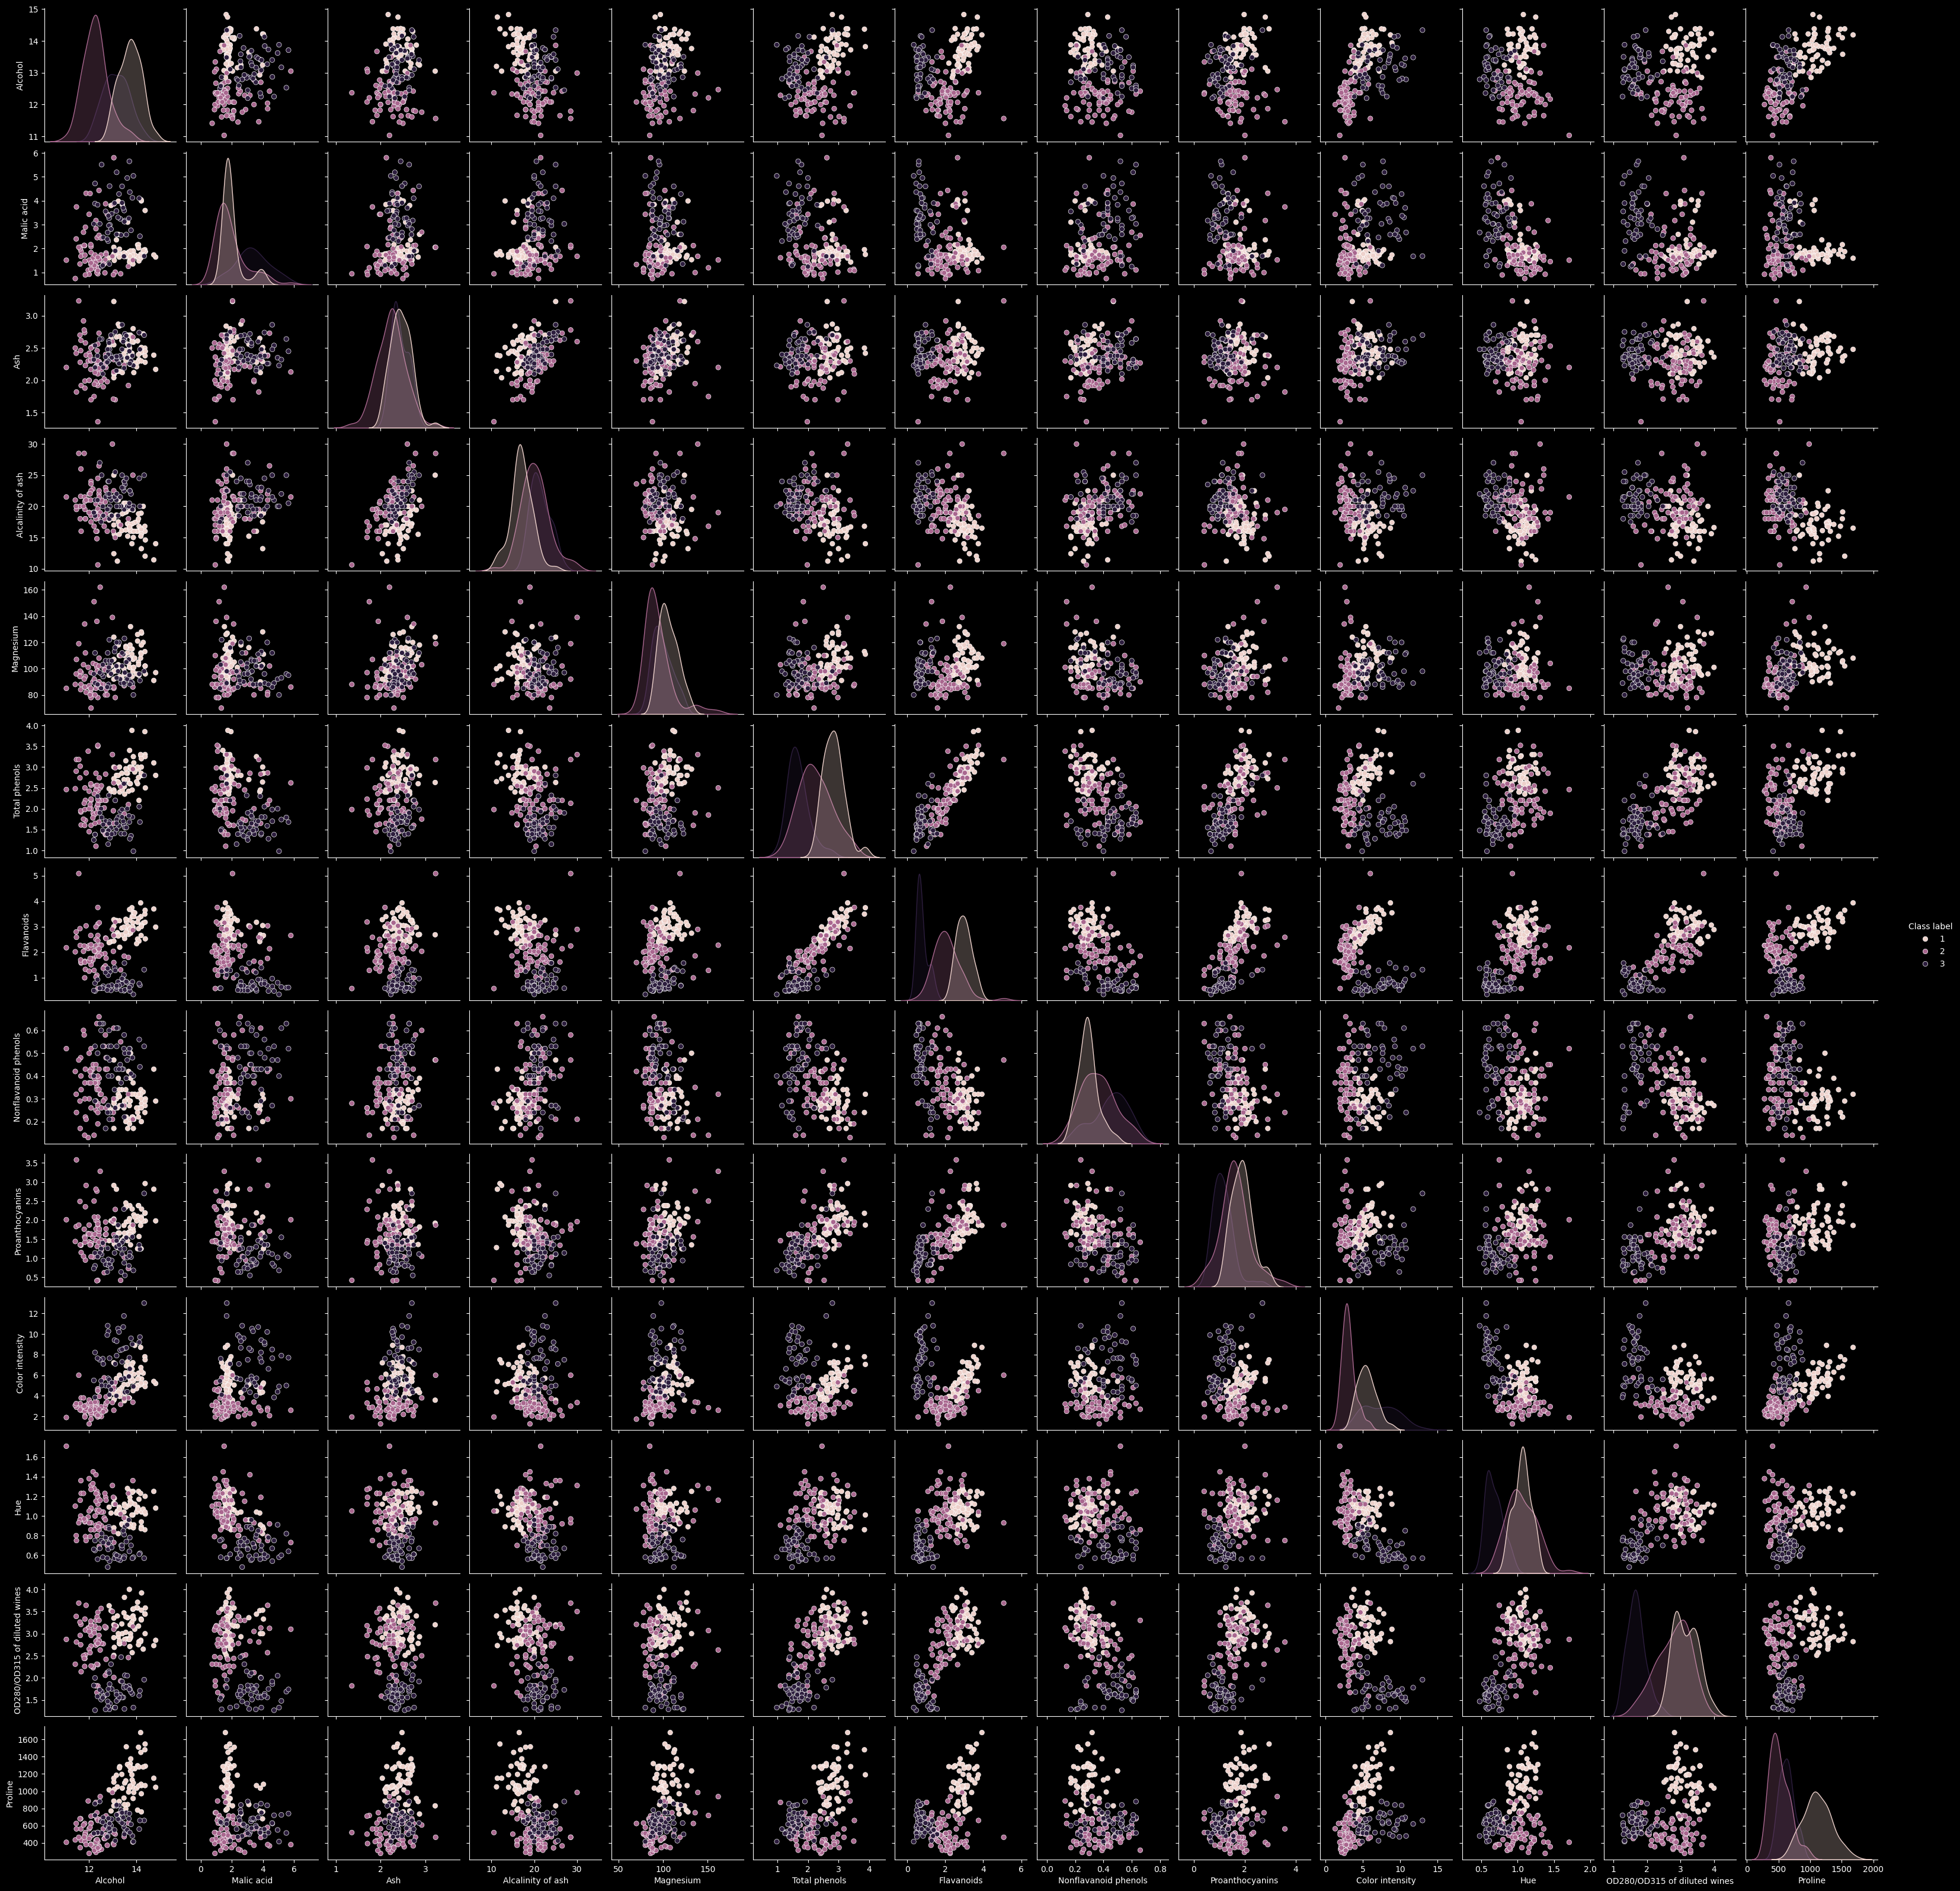

</details>

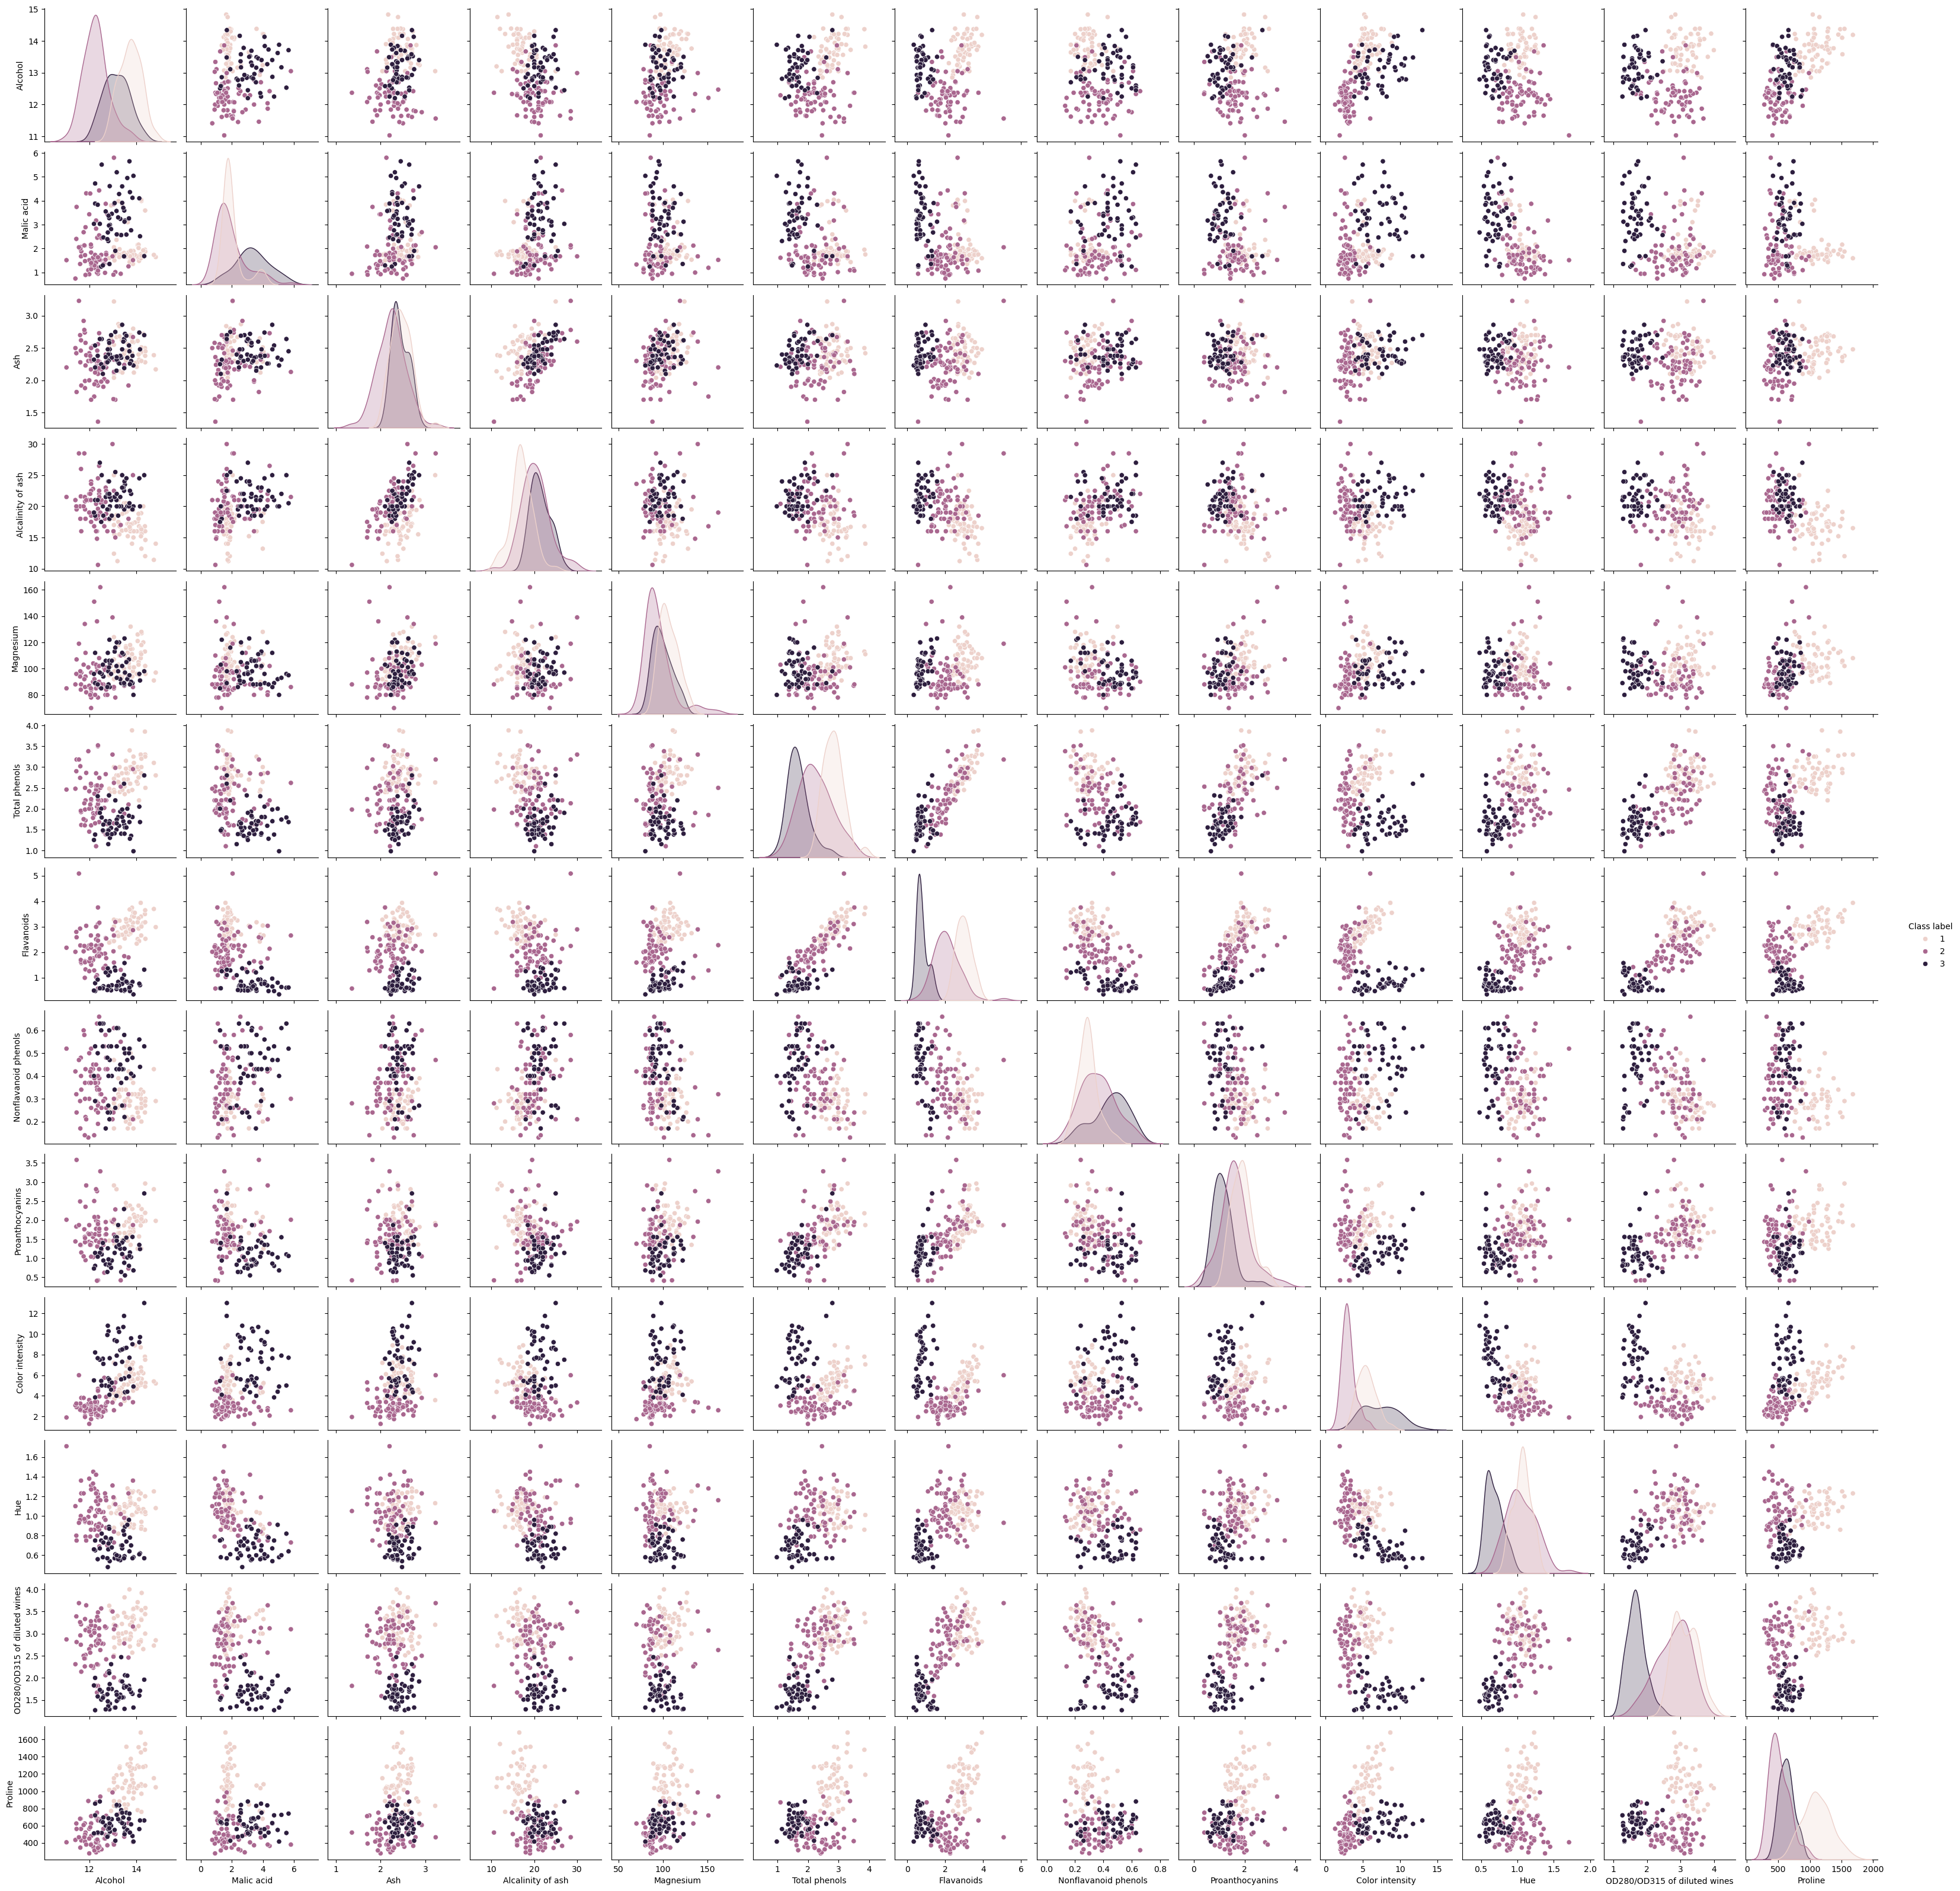

In [9]:
### START CODE HERE ###
sns.pairplot(df,hue= 'Class label' )
### END CODE HERE ###

## Principal Component Analysis (PCA)

**Calculate PCA of all varaiables**

<details>

<summary>
<font size="3" color="green">
<b>Hints</b>
</font>
</summary>

- `PCA()`
- This might be useful : https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html
</details>
<br>
<details>

<summary>
<font size="3" color="orange">
<b>Expected output</b>
</font>
</summary>

```
Explained Variance ratio: [0.36198848 0.1920749  0.11123631 0.0706903  0.06563294 0.04935823
 0.04238679 0.02680749 0.02222153 0.01930019 0.01736836 0.01298233
 0.00795215]
Explained Variance (eigenvalues) : [4.73243698 2.51108093 1.45424187 0.92416587 0.85804868 0.64528221
 0.55414147 0.35046627 0.29051203 0.25232001 0.22706428 0.16972374
 0.10396199]
--------------------------------------------
PCA components (eigenvectors) :
[[-0.23932041  0.1443294  -0.00205106 -0.0886167   0.4229343   0.29671456
   0.14199204 -0.24518758 -0.2985331   0.37616741  0.31342949  0.28675223
   0.39466085]
 [ 0.0105905  -0.48365155 -0.31606881 -0.52999567  0.00335981  0.27923515
  -0.299634   -0.22493093 -0.02877949  0.16449619 -0.03930172 -0.36490283
  -0.06503951]]
```
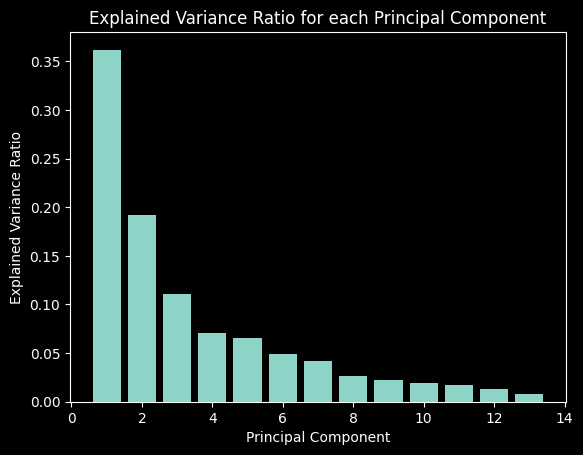


</details>


Explained Variance ratio: [9.98091230e-01 1.73591562e-03 9.49589576e-05 5.02173562e-05
 1.23636847e-05 8.46213034e-06 2.80681456e-06 1.52308053e-06
 1.12783044e-06 7.21415811e-07 3.78060267e-07 2.12013755e-07
 8.25392788e-08]
Explained Variance (eigenvalues) : [9.92017895e+04 1.72535266e+02 9.43811370e+00 4.99117861e+00
 1.22884523e+00 8.41063869e-01 2.78973523e-01 1.51381266e-01
 1.12096765e-01 7.17026032e-02 3.75759789e-02 2.10723661e-02
 8.20370314e-03]
--------------------------------------------
PCA components (eigenvectors) :
[[-4.67130058e-03  1.65926472e-03  1.94905742e-04  2.32714319e-03
   1.56728830e-03  1.71380037e-04  1.78680075e-02 -6.81015556e-04
  -1.23086662e-04  7.04931645e-04  6.00607792e-04  9.99822937e-01
   9.89829680e-04]
 [ 2.64503930e-02  1.20340617e-03  4.59369254e-03  1.51003530e-02
  -5.18507284e-05 -7.62673115e-04  9.99344186e-01  2.15498184e-03
  -1.35447892e-03 -3.49536431e-03  5.00440040e-03 -1.77738095e-02
   8.77962152e-04]
 [-9.38593003e-01 -1.6873809

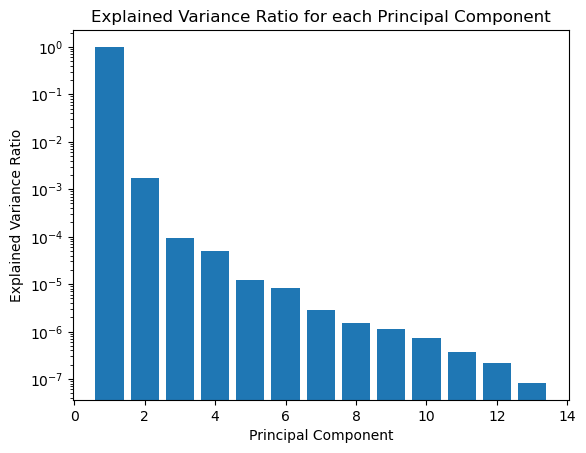

In [32]:
### START CODE HERE ###
pca = PCA()
X_pca = pca.fit_transform(X)
print('Explained Variance ratio:',pca.explained_variance_ratio_)
print('Explained Variance (eigenvalues) :', pca.explained_variance_)
print('--------------------------------------------')
print('PCA components (eigenvectors) :')
print(pca.components_)

plt.bar(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_)
plt.yscale('log') ##สเกลให้อยู่ในรูป Log จะแสดงค่ายกกำลังน้อยๆได้
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio for each Principal Component')
plt.show()
### END CODE HERE ###

**Calculate PCA of 3 varaiables**

<details>

<summary>
<font size="3" color="green">
<b>Hints</b>
</font>
</summary>

- `PCA()`
- This might be useful : https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html
</details>
<br>
<details>

<summary>
<font size="3" color="orange">
<b>Expected output</b>
</font>
</summary>

```
Explained Variance ratio: [0.36198848 0.1920749 ]
Explained Variance (eigenvalues) : [4.73243698 2.51108093]
--------------------------------------------
PCA components (eigenvectors) :
[[-0.23932041  0.1443294  -0.00205106 -0.0886167   0.4229343   0.29671456
   0.14199204 -0.24518758 -0.2985331   0.37616741  0.31342949  0.28675223
   0.39466085]
 [ 0.0105905  -0.48365155 -0.31606881 -0.52999567  0.00335981  0.27923515
  -0.299634   -0.22493093 -0.02877949  0.16449619 -0.03930172 -0.36490283
  -0.06503951]]
```
![SegmentLocal](PCA_3_components.png "segment")

</details>


Explained Variance ratio: [9.98091230e-01 1.73591562e-03 9.49589576e-05]
Explained Variance (eigenvalues) : [9.92017895e+04 1.72535266e+02 9.43811370e+00]
--------------------------------------------
PCA components (eigenvectors) :
[[-4.67130058e-03  1.65926472e-03  1.94905742e-04  2.32714319e-03
   1.56728830e-03  1.71380037e-04  1.78680075e-02 -6.81015556e-04
  -1.23086662e-04  7.04931645e-04  6.00607792e-04  9.99822937e-01
   9.89829680e-04]
 [ 2.64503930e-02  1.20340617e-03  4.59369254e-03  1.51003530e-02
  -5.18507284e-05 -7.62673115e-04  9.99344186e-01  2.15498184e-03
  -1.35447892e-03 -3.49536431e-03  5.00440040e-03 -1.77738095e-02
   8.77962152e-04]
 [-9.38593003e-01 -1.68738094e-02 -5.19874304e-02 -2.91398464e-01
   8.54433387e-02  2.59776624e-02  2.97802484e-02 -1.22003373e-01
  -1.35107797e-02  7.03239693e-02  2.46593824e-02 -4.52868159e-03
   4.04846439e-02]]


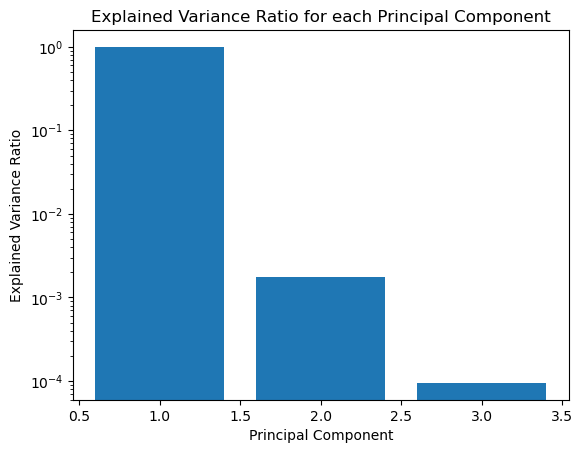

In [37]:
### START CODE HERE ###
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X)
print('Explained Variance ratio:',pca.explained_variance_ratio_)
print('Explained Variance (eigenvalues) :', pca.explained_variance_)
print('--------------------------------------------')
print('PCA components (eigenvectors) :')
print(pca.components_)
plt.bar(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_)
plt.yscale('log')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio for each Principal Component')
plt.show()
### END CODE HERE ###

### **Train/Test Model**

**Train/Test Split**

Split the dataset into training and testing sets. Reserve frist 80% of data for training and last 20% for testing.

In [38]:
### START CODE HERE ###

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

### END CODE HERE ###

Split training data into training (70%) and validation sets (30%). 

In [39]:
### START CODE HERE ###

X_train, X_validate, Y_train, Y_validate = train_test_split(X_train, Y_train, test_size=0.3)

### END CODE HERE ###

**Initialize models**
- `LinearRegression()`

In [41]:
### START CODE HERE ###

# model = LinearRegression()
# model.fit(X_train, Y_train)
# Y_pred = model.predict(X_validate) #pridict

model = LinearRegression(copy_X=True, fit_intercept, normalize)
model = SVR(kernel, gamma, C, epsilon)

### END CODE HERE ###

### Model Training 

Train LinearRegerssion() using
1. X original data

In [ ]:
### START CODE HERE ###

model.fit(X_train, Y_train)

### END CODE HERE ###

2. X_PCA with n_components = n 
- (Choose n at least 3 values from n_list = range(1,N)
- N = จำนวน input Feature (dimension of X)

In [ ]:
### START CODE HERE ###

### END CODE HERE ###

**Model Performance Evaluation (MSE, R-square)**


<details>

<summary>
<font size="3" color="green">
<b>Hints</b>
</font>
</summary>

- mean_squared_error(), r2_score()

- Scikitlearn's `metrics` migth be useful here.</br>
https://scikit-learn.org/stable/modules/model_evaluation.html

</details> 
<br>
<details>

<summary>
<font size="3" color="orange">
<b>Expected output</b>
</font>
</summary>

</br>

| | n  | val_MSE  | test_MSE |  val_r2  | test_r2  |
|-|----|----------|----------|----------|----------|
|0| 0  | 0.051039 | 0.111825 | 0.914363 | 0.823047 |
|1| 1  | 0.106382 | 0.153570 | 0.821506 | 0.756988 |
|2| 2  | 0.106146 | 0.155484 | 0.821902 | 0.753960 |
|3| 3  | 0.113444 | 0.171154 | 0.809658 | 0.729162 |
|4| 4  | 0.113062 | 0.175151 | 0.810297 | 0.722838 |
|5| 5  | 0.096968 | 0.146228 | 0.837302 | 0.768607 |
|6| 7  | 0.072978 | 0.119330 | 0.877554 | 0.811170 |
|7| 10 | 0.057971 | 0.107307 | 0.902733 | 0.830195 |
|8| 13 | 0.051039 | 0.111825 | 0.914363 | 0.823047 |


</details>

1. Model Evaluation with Validation and Test Data

In [ ]:
### START CODE HERE ###

### END CODE HERE ###

2. Calculate Model Performance Metrics (MSE, R-square) of Validation and Test Data

In [ ]:
### START CODE HERE ###

### END CODE HERE ###

## Bar Graph for MSE, R-Square Comparison
<details>

<summary>
<font size="3" color="orange">
<b>Expected output</b>
</font>
</summary>

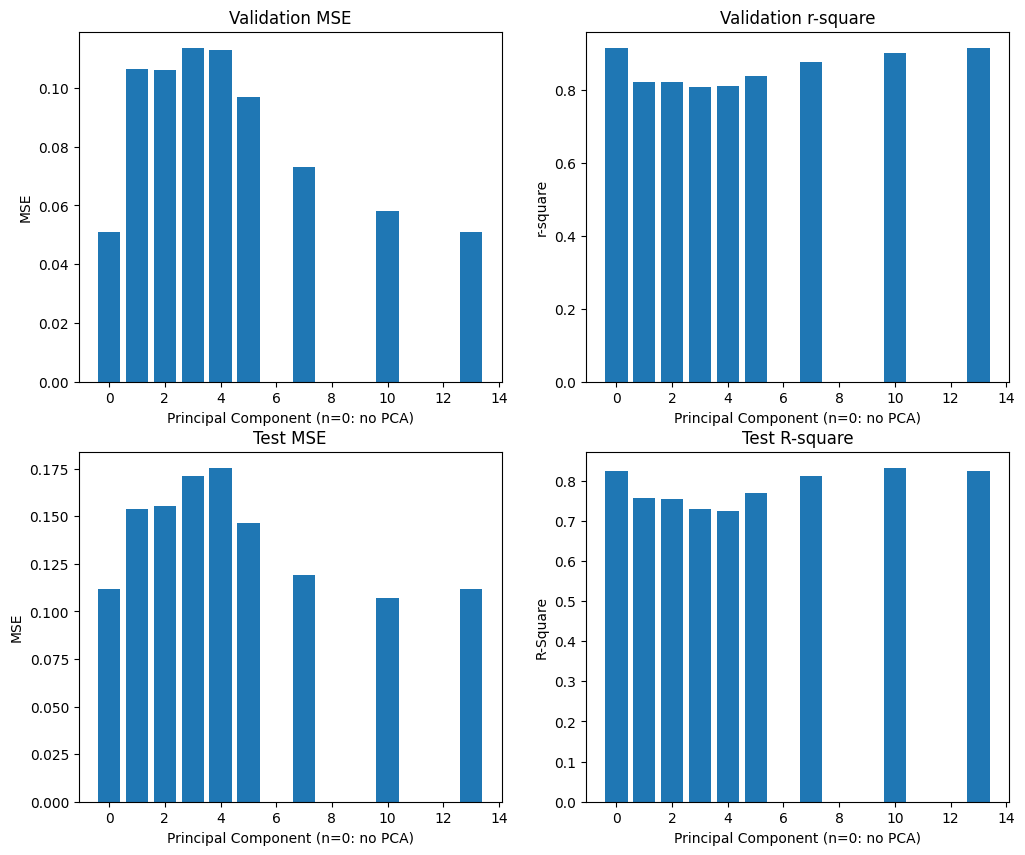

</br>

In [ ]:
### START CODE HERE ###
plt.figure(figsize=())
plt.subplot(2,2,1), plt.bar()
plt.title('Validation MSE')
plt.ylabel('MSE')
plt.xlabel('Principal Component (n=0: no PCA)')

...

plt.show()
### END CODE HERE ###

## Question
1. What is the optimal value of n that 
- ensures the Mean Squared Error (MSE) difference by no more than 0.01 from the MSE of the original data?

2. When taking into account R-square, what optimum value of n 
- results in an R-square difference not exceeding 0.1 from the R-square of the original data?

3. Determine the dimension reduction ratio (m / N), where:
- m is the minimum of the optimum values of n obtained from questions 2 and 3.
- N represents the number of input features (dimension of X).

In [ ]:
# Ans